# **EXPLORATORY DATA ANALYSIS**

### **Initial setup**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
route = "/content/drive/MyDrive/IMPACT PROJECT"

In [4]:
behaviors_cols = ['Impression_ID', 'User_ID', 'Time', 'History', 'Impressions']
news_cols = ['News_ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL', 'Title_Entities', 'Abstract_Entities']

train_behaviors = pd.read_csv(f"{route}/train/behaviors.tsv", sep="\t", header=None, names=behaviors_cols)
train_news = pd.read_csv(f"{route}/train/news.tsv", sep="\t", header=None, names=news_cols)

test_behaviors = pd.read_csv(f"{route}/test/behaviors.tsv", sep="\t", header=None, names=behaviors_cols)
test_news = pd.read_csv(f"{route}/test/news.tsv", sep="\t", header=None, names=news_cols)

val_behaviors = pd.read_csv(f"{route}/valid/behaviors.tsv", sep="\t", header=None, names=behaviors_cols)
val_news = pd.read_csv(f"{route}/valid/news.tsv", sep="\t", header=None, names=news_cols)

## **BEHAVIORS**

Let's extract some basic information about the behaviors dataset

The DataFrame consists of 156,965 rows and 5 columns. Each row represents an entry or observation, while each column represents a specific attribute or feature of the data.

The columns in the DataFrame are as follows:

1. `Impression_ID`: An integer column representing the unique identification number of each impression.
2. `User_ID`: A string column representing the unique identification number of each user.
3. `Time`: A string column representing the time associated with each impression.
4. `History`: A string column representing the historical information related to each impression. It appears that there are 153,727 non-null values, indicating some missing data.
5. `Impressions`: A string column representing the details or characteristics of each impression.

The data types of the columns include an integer (int64) for Impression_ID and objects (strings) for the other four columns.

In [5]:
train_behaviors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156965 entries, 0 to 156964
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Impression_ID  156965 non-null  int64 
 1   User_ID        156965 non-null  object
 2   Time           156965 non-null  object
 3   History        153727 non-null  object
 4   Impressions    156965 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
print(train_behaviors.isnull().sum())

Impression_ID       0
User_ID             0
Time                0
History          3238
Impressions         0
dtype: int64


## **NEWS**

The DataFrame has 51,282 entries or rows, ranging from 0 to 51,281. It consists of 8 columns.

The column names and their respective descriptions are as follows:

1. `News_ID`: An object column representing the identification number or code of each news entry.
2. `Category`: An object column indicating the category or broad classification of each news entry.
3. `SubCategory`: An object column specifying the subcategory or more specific classification of each news entry.
4. `Title`: An object column containing the title or headline of each news entry.
5. `Abstract`: An object column representing the summary or brief description of each news entry. It appears that there are 48,616 non-null values, suggesting some missing data in this column.
6. `URL`: An object column containing the URL or web link associated with each news entry.
7. `Title_Entities`: An object column specifying the entities or named entities extracted from the title of each news entry. There are 51,279 non-null values in this column.
8. `Abstract_Entities`: An object column representing the entities or named entities extracted from the abstract or summary of each news entry. There are 51,278 non-null values in this column.

In [10]:
train_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51282 entries, 0 to 51281
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   News_ID            51282 non-null  object
 1   Category           51282 non-null  object
 2   SubCategory        51282 non-null  object
 3   Title              51282 non-null  object
 4   Abstract           48616 non-null  object
 5   URL                51282 non-null  object
 6   Title_Entities     51279 non-null  object
 7   Abstract_Entities  51278 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


In [11]:
print(train_news.isnull().sum())

News_ID                 0
Category                0
SubCategory             0
Title                   0
Abstract             2666
URL                     0
Title_Entities          3
Abstract_Entities       4
dtype: int64


Some news articles do not seem to have an abstract, this is completely normal and can also happen in a real-world scenario

## **COUNT OF NEWS CATEGORIES**

First, we are displaying the top most viewed categories with their specific subcategories.

In [12]:
c=train_news[['Category','SubCategory']].value_counts()

In [13]:
index=[]
for i in c.index:
    index.append(np.array(i))
index=np.array(index)

In [14]:
df=pd.DataFrame(columns=['Category','Sub Category','Values'])
df['Category']=index[:,0]
df['Sub Category']=index[:,1]
df['Values']=c.values

In [15]:
px.bar(data_frame=df,x='Category',y='Values',color='Sub Category')

## **WORDCLOUDS**

Word clouds are visual representations of text data where the size of each word corresponds to its frequency or importance. They are used to highlight the most common or significant words in a dataset, aiding in quick visual analysis and identifying key themes or patterns.

### **SPORTS**

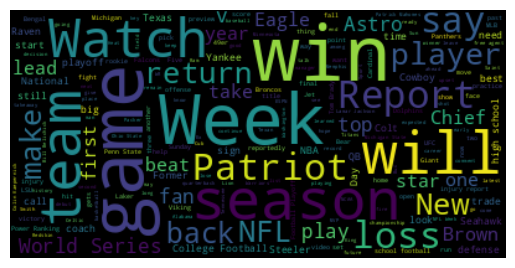

In [16]:
text=' '
for i in train_news[train_news['Category']=='sports']['Title']:
    text+=i+' '

# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

### **NEWS**

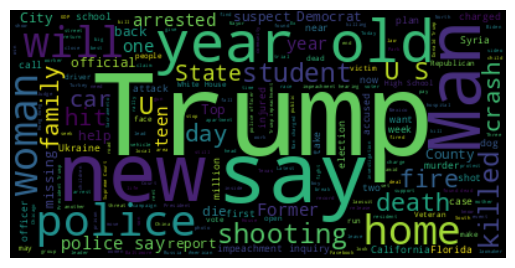

In [17]:
text=' '
for i in train_news[train_news['Category']=='news']['Title']:
    text+=i+' '

# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

## **HISTOGRAM FOR TITLE LENGTH**

Here, we are able to visualize the different title lenghts by length, and the categorization of them based on the news type.

In [18]:
t=[]
for i in train_news['Title']:
    t.append(len(i))
px.histogram(t,color=train_news['Category'])

## **HISTOGRAM FOR ABSTRACT LENGTH**

Same thing but for the abstract. we can expect longer texts in here, as well as some articles with no abstract at all.

In [19]:
t = []
for i in train_news['Abstract']:
    t.append(len(str(i)))
px.histogram(t,color=train_news['Category'], nbins=100)

----------

## **DUPLICATE NEWS**

Seems like there are around 1500 news articles with at least one copy in the dataset.

In [23]:
# Find duplicate news articles based on the 'Title' column
duplicate_news = train_news[train_news.duplicated(['Title'], keep=False)]

# Display the resulting DataFrame
duplicate_news.head()

,News_ID,Category,SubCategory,Title,Abstract,URL,Title_Entities,Abstract_Entities
86,N61864,news,newsopinion,The News In Cartoons,News as seen through the eyes of the nation's ...,https://assets.msn.com/labs/mind/AABGTFJ.html,[],[]
195,N59709,sports,football_nfl,Adrian Peterson had to 'hold back tears' in re...,Adrian Peterson returned to Minnesota on Thurs...,https://assets.msn.com/labs/mind/AAJl4BK.html,"[{""Label"": ""Adrian Peterson"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Adrian Peterson"", ""Type"": ""P"", ""Wi..."
202,N13882,sports,football_nfl,Adrian Peterson had to 'hold back tears' in re...,Adrian Peterson returned to Minnesota on Thurs...,https://assets.msn.com/labs/mind/AAJl4BQ.html,"[{""Label"": ""Adrian Peterson"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Adrian Peterson"", ""Type"": ""P"", ""Wi..."
225,N6632,entertainment,celebrity,Star Tracks: Celebs on Vacation,Celebrity Vacations: Where Stars Travel,https://assets.msn.com/labs/mind/AADzDnw.html,[],[]
239,N14042,autos,autosnews,Latest Automotive Safety Recalls,The latest safety recalls issued by the Nation...,https://assets.msn.com/labs/mind/AAFfB8g.html,[],"[{""Label"": ""National Highway Traffic Safety Ad..."


## **CLICKS AND NO-CLICKS**

Calculating the number of clicks and no-clicks per dataset. This will help in metrics for later.

In [21]:
# Define helper function to count clicks and no clicks
def count_clicks(s):
    items = s.split()
    return sum(1 for item in items if item[-1] == '1'), sum(1 for item in items if item[-1] == '0')

# Apply helper function to Impressions column
train_behaviors['Clicks'], train_behaviors['No_Clicks'] = zip(*train_behaviors['Impressions'].apply(count_clicks))
test_behaviors['Clicks'], test_behaviors['No_Clicks'] = zip(*test_behaviors['Impressions'].apply(count_clicks))
val_behaviors['Clicks'], val_behaviors['No_Clicks'] = zip(*val_behaviors['Impressions'].apply(count_clicks))


# Get total number of clicks and no clicks
total_clicks_train = train_behaviors['Clicks'].sum()
total_no_clicks_train = train_behaviors['No_Clicks'].sum()

total_clicks_test = test_behaviors['Clicks'].sum()
total_no_clicks_test = test_behaviors['No_Clicks'].sum()

total_clicks_val = val_behaviors['Clicks'].sum()
total_no_clicks_val = val_behaviors['No_Clicks'].sum()

print("Train")
print("------------------------------")
print(f'Total clicks: {total_clicks_train}')
print(f'Total no clicks: {total_no_clicks_train}')
print("")
print("Test")
print("------------------------------")
print(f'Total clicks: {total_clicks_test}')
print(f'Total no clicks: {total_no_clicks_test}')
print("------------------------------")
print("")
print("Valid")
print("------------------------------")
print(f'Total clicks: {total_clicks_val}')
print(f'Total no clicks: {total_no_clicks_val}')
print("------------------------------")

Train
------------------------------
Total clicks: 236344
Total no clicks: 5607100

Test
------------------------------
Total clicks: 111383
Total no clicks: 2629615
------------------------------

Valid
------------------------------
Total clicks: 111383
Total no clicks: 2629615
------------------------------
